# <font color= blue>Portuguese Banking Institution Marketing Campaigns</font>
##  <font color= purple>A Comparison Between Four Clessifier Models - Will a Client Choose a Term Deposit.  A Project By Liat Genosar Roth.</font>
###  <font color= blue>This Project was made for Practical Application Assignment, Module 17</font>

In this project, my goal is to compare the performance of 4 classifiers: k-nearest neighbors, logistic regression, decision trees, and SVM - support vector machines. 

Data:
The dataset is related to the marketing of bank products over the telephone. It comes from the UCI Machine Learning repository. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns.

Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

**About the dataset:**
There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

**The classification goal is to predict if the client will subscribe a term deposit - the target - 'y' col.**

 - Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

 - Number of Features: 16 + output feature.



In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import mean_squared_error

In [92]:
url = 'https://github.com/Liatgenosar/Bank-Deposit-Products/blob/main/bank-full.csv?raw=true'
df = pd.read_csv(url, sep=';')

##  <font color= darkred> Data Inspection</font>

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Input variables:**
   
   Bank client data:
   1 - age (numeric)
   
   2 - job : 
   type of job (categorical:           "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
 **Related with the last contact of the current campaign:**
 
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  **Other attributes:**
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  
**y - has the client subscribed a term deposit? (binary: "yes","no")**

In [8]:
df.isna().sum()
# No missing values here

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#from pandas_profiling import ProfileReport

In [10]:
df.describe()
# Description of the numeric (non-categorical or non-binary) features

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Dropping columns that do not contribute to the outcome:**

In [12]:
#day: last contact day of the month (numeric).
#Has no meaning here since it depends on the time of the survey which is not provided here.
df = df.drop(['day'], axis = 1)

In [13]:
# month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
# The same rational here, it has no meaning here and does not contribute to the outcome.
# Month col. is relative and we do not have a reference point.
df = df.drop(['month'], axis = 1)

**Taking care of pdays col.**

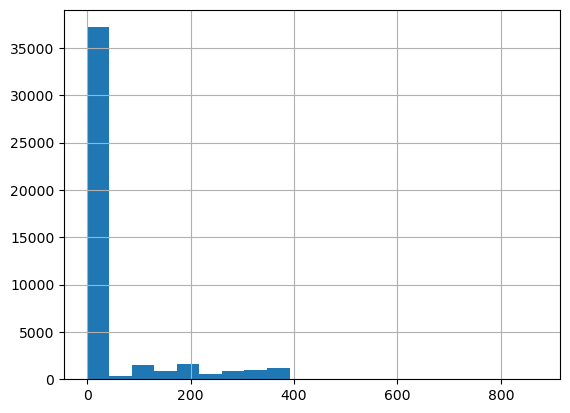

In [14]:
df['pdays'].hist(bins = 20);

In [15]:
# pdays: number of days that passed by after the client was last contacted 
# from a previous campaign (numeric, -1 means client was not previously contacted).

# That means that -1 value should be replaced with 0.

df['pdays'] = np.where(df['pdays'] == -1, 0, df['pdays'])

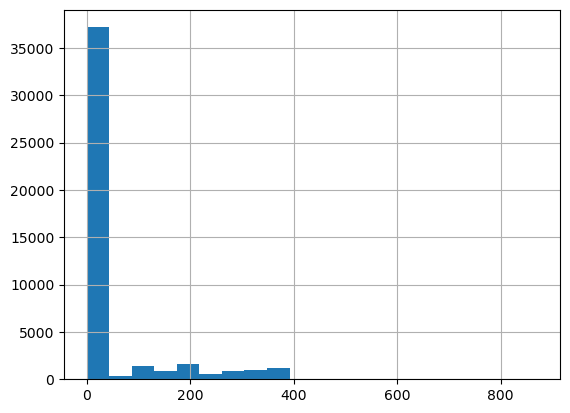

In [16]:
# How does pdays look now:
df['pdays'].hist(bins = 20);

In [17]:
df['pdays'].describe()

count    45211.000000
mean        41.015195
std         99.792615
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        871.000000
Name: pdays, dtype: float64

**Taking care of categorical features**
I'm giving numeric weights to each catogry in a feature, so I won't end up with a lot of columns afer going through OneHotEncoder.

In [18]:
#marital : marital status 
# (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
df['marital'] = np.where(df['marital'] == 'married', 3, df['marital'])
df['marital'] = np.where(df['marital'] == 'single', 1, df['marital'])
df['marital'] = np.where(df['marital'] == 'divorced', 2, df['marital'])

In [20]:
df['marital'].value_counts()

3    27214
1    12790
2     5207
Name: marital, dtype: int64

In [21]:
# education (categorical: "unknown","secondary","primary","tertiary")

df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [22]:
df['education'] = np.where(df['education'] == 'unknown', 1, df['education'])
df['education'] = np.where(df['education'] == 'primary', 2, df['education'])
df['education'] = np.where(df['education'] == 'secondary', 3, df['education'])
df['education'] = np.where(df['education'] == 'tertiary', 4, df['education'])

In [23]:
df['education'].value_counts()

3    23202
4    13301
2     6851
1     1857
Name: education, dtype: int64

In [24]:
#contact: contact communication type (categorical: "unknown","telephone","cellular")

df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [25]:
df['contact'] = np.where(df['contact'] == 'unknown', 1, df['contact'])
df['contact'] = np.where(df['contact'] == 'telephone', 2, df['contact'])
df['contact'] = np.where(df['contact'] == 'cellular', 3, df['contact'])

In [26]:
df['contact'].value_counts()

# Small fraction of customers have old fasion telephone 

3    29285
1    13020
2     2906
Name: contact, dtype: int64

In [27]:
# job : type of job (categorical: "admin.","unknown","unemployed",
#.  "management","housemaid","entrepreneur","student", "blue-collar",
#   "self-employed","retired","technician","services")

df['job'].value_counts()
# 12 unique values

# I'll give numeric integer value/weight according to a job rank I made

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

I put that in a comment. job col. will go to OneHotEncoder. Each job type might have a significance on its own.

df['job'] = np.where(df['job'] == 'unemployed', 1, df['job'])
df['job'] = np.where(df['job'] == 'unknown', 2, df['job'])
df['job'] = np.where(df['job'] == 'student', 3, df['job'])
df['jobm = np.where(df['job'] == 'self-employed', 4, df['job'])
df['job'] = np.where(df['job'] == 'blue-collar', 5, df['job'])
df['job'] = np.where(df['job'] == 'housemaid', 6, df['job'])
df['job'] = np.where(df['job'] == 'retired', 7, df['job'])
df['job'] = np.where(df['job'] == 'technician', 8, df['job'])
df['job'] = np.where(df['job'] == 'services', 9, df['job'])
df['job'] = np.where(df['job'] == 'admin.', 10, df['job'])
df['job'] = np.where(df['job'] == 'entrepreneur', 11, df['job'])
df['job'] = np.where(df['job'] == 'management', 12, df['job'])

In [28]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Changing binary yes/no columns to 1/0**

In [29]:
#  default: has credit in default? (binary: "yes","no")

df['default'] = np.where(df['default'] == 'yes', 1, 0)

In [30]:
df['default'].value_counts()
# Vast majority of clients has no credit in default

0    44396
1      815
Name: default, dtype: int64

In [31]:
# housing: has housing loan? (binary: "yes","no")

df['housing'] = np.where(df['housing'] == 'yes', 1, 0)

In [32]:
df['housing'].value_counts()

# Looks like a balanced col. here

1    25130
0    20081
Name: housing, dtype: int64

In [33]:
# loan: has personal loan? (binary: "yes","no")

df['loan'] = np.where(df['loan'] == 'yes', 1, 0)

In [34]:
df['loan'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

# Almost 84% of clients do not have a personal loan

,loan
0,83.98%
1,16.02%


**Check the dataset after all those chanhes and adjastments**

In [35]:
df['contact'].unique()
# contact values turned form int to object..?
df['contact'] = df['contact'].astype("int64")

In [36]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211.0,45211.0,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214.0,23202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,0.018027,1362.272058,0.555838,0.160226,2.359758,258.163080,2.763841,41.015195,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,0.133049,3044.765829,0.496878,0.366820,0.897951,257.527812,3.098021,99.792615,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,0.000000,72.000000,0.000000,0.000000,1.000000,103.000000,1.000000,0.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,0.000000,448.000000,1.000000,0.000000,3.000000,180.000000,2.000000,0.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,0.000000,1428.000000,1.000000,0.000000,3.000000,319.000000,3.000000,0.000000,0.000000,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(10), object(5)
memory usage: 5.2+ MB


In [38]:
df['education'].value_counts()

3    23202
4    13301
2     6851
1     1857
Name: education, dtype: int64

In [39]:
# education col. appears as an object type. Convert back to int64
df['education'] = df['education'].astype("int64")

In [40]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

**y - the target column. Change to 1/0**

In [41]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [42]:
df['y'] = np.where(df['y'] == 'yes', 1, 0)
df['y'].unique()

array([0, 1])

poutcome and job columns will go to the one hot encoder

# <font color=darkred>EDA - Exploratory Data Analysis </font>

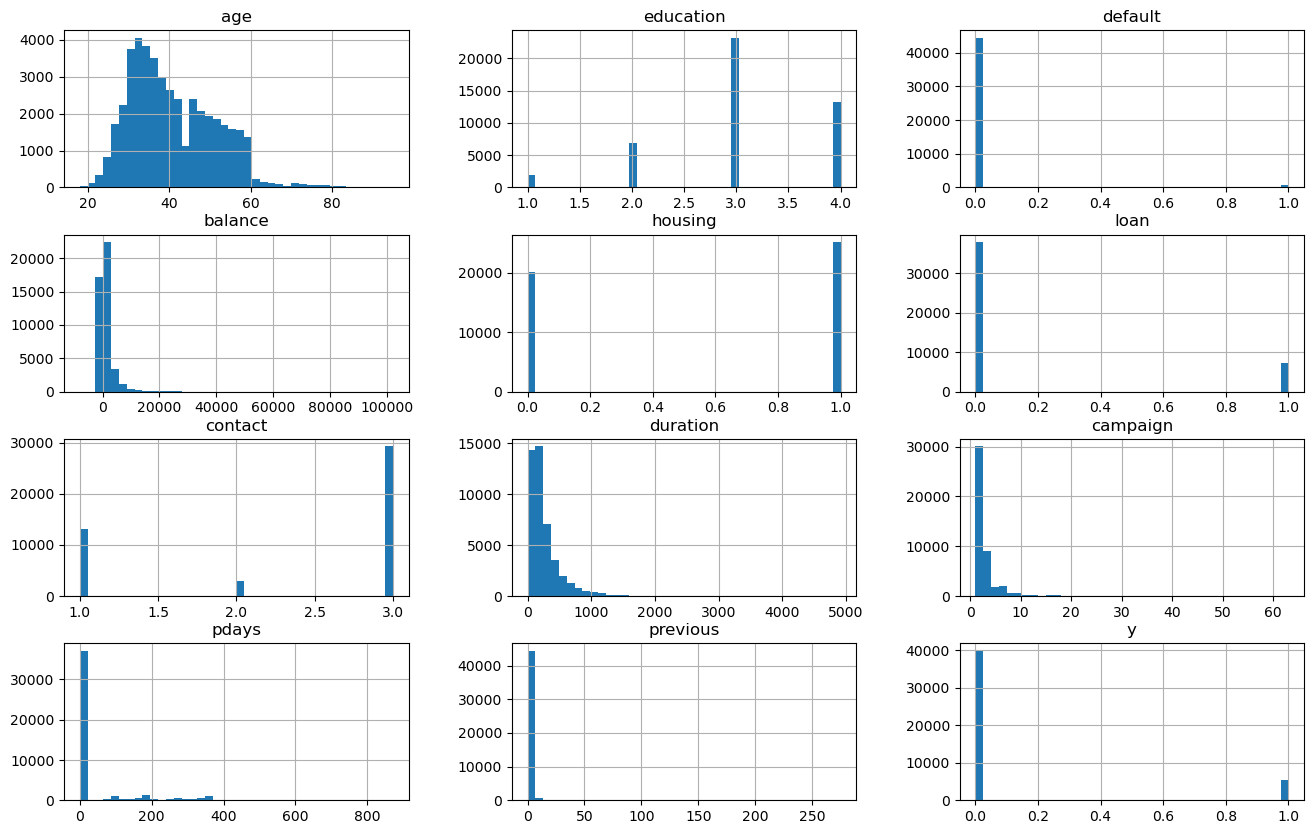

In [43]:
df.hist(bins = 40,figsize = (16,10));

Correlations with the target column y

In [44]:
corr_matrix = df.corr()

In [45]:
corr_matrix['y'].sort_values(ascending=False)

y            1.000000
duration     0.394521
contact      0.148395
pdays        0.103323
previous     0.093236
balance      0.052838
education    0.051341
age          0.025155
default     -0.022419
loan        -0.068185
campaign    -0.073172
housing     -0.139173
Name: y, dtype: float64

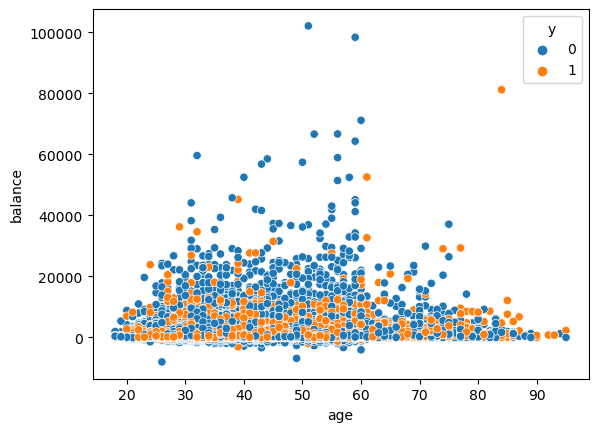

In [46]:
sns.scatterplot(data=df, x='age', y='balance', hue = 'y');

No correlation between age and balance, and with both with the target col.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

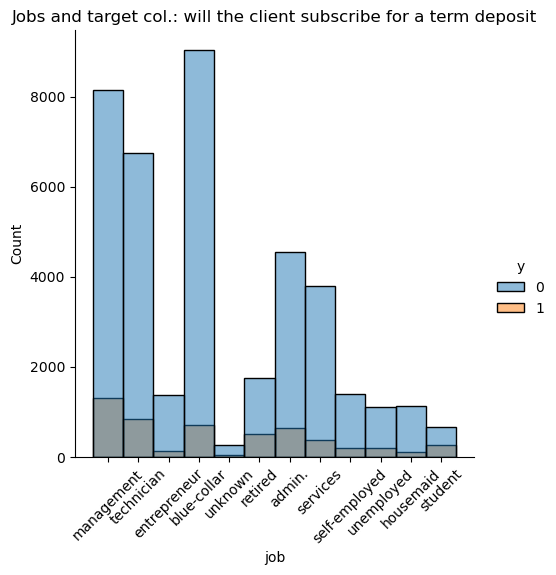

In [47]:
sns.displot(data=df, x='job', hue = 'y', color=[0.34,0.5,0.6])
plt.title("Jobs and target col.: will the client subscribe for a term deposit")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Last contact duration and target col.: will the client subscribe for a term deposit')

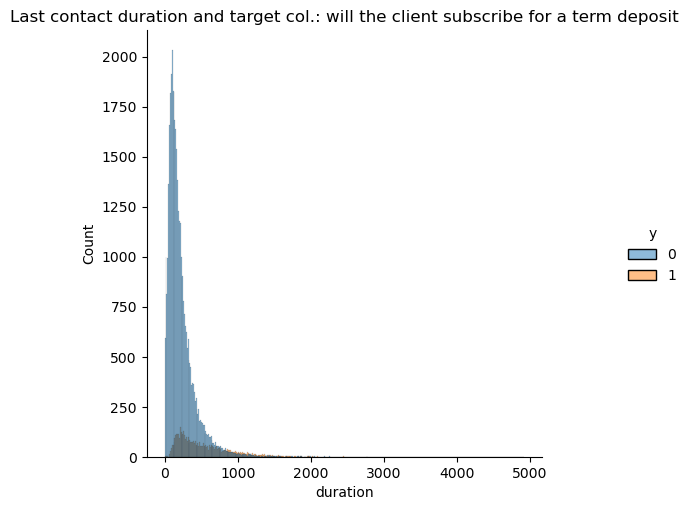

In [48]:
# duration: last contact duration, in seconds (numeric)
# duration col. showed a high correlation with the target
sns.displot(data=df, x='duration', hue = 'y', color=[0.54,0.2,0.15])
plt.title("Last contact duration and target col.: will the client subscribe for a term deposit")

#  <font color= darkred> Data Prep for Modeling </font>

OneHotEncoder for the categorical columns poutcome and job and then scale remainder of data

In [49]:
X = df.drop(['y'], axis = 1)
y = df['y']

In [89]:
X.shape

(45211, 14)

In [50]:
transformer = make_column_transformer((OneHotEncoder(drop='if_binary'),['job', 'poutcome']),
                           remainder=StandardScaler())
X_t = transformer.fit_transform(X)

In [51]:
X_t

array([[ 0.        ,  0.        ,  0.        , ..., -0.56935064,
        -0.41100886, -0.25194037],
       [ 0.        ,  0.        ,  0.        , ..., -0.56935064,
        -0.41100886, -0.25194037],
       [ 0.        ,  0.        ,  1.        , ..., -0.56935064,
        -0.41100886, -0.25194037],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.72181052,
         1.43283534,  1.05047333],
       [ 0.        ,  1.        ,  0.        , ...,  0.39902023,
        -0.41100886, -0.25194037],
       [ 0.        ,  0.        ,  1.        , ..., -0.24656035,
         1.47291891,  4.52357654]])

In [52]:
X_t = pd.DataFrame(X_t)
X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.206484,-0.13549,0.256419,0.893915,-0.436803,-1.514306,0.011016,-0.569351,-0.411009,-0.25194
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.077715,-0.13549,-0.437895,0.893915,-0.436803,-1.514306,-0.416127,-0.569351,-0.411009,-0.25194
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.077715,-0.13549,-0.446762,0.893915,2.289359,-1.514306,-0.707361,-0.569351,-0.411009,-0.25194
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.646114,-0.13549,0.047205,0.893915,-0.436803,-1.514306,-0.645231,-0.569351,-0.411009,-0.25194
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.646114,-0.13549,-0.447091,-1.118674,-0.436803,-1.514306,-0.233620,-0.569351,-0.411009,-0.25194


In [53]:
features_names = transformer.get_feature_names_out()

In [54]:
features_names

array(['onehotencoder__job_admin.', 'onehotencoder__job_blue-collar',
       'onehotencoder__job_entrepreneur', 'onehotencoder__job_housemaid',
       'onehotencoder__job_management', 'onehotencoder__job_retired',
       'onehotencoder__job_self-employed', 'onehotencoder__job_services',
       'onehotencoder__job_student', 'onehotencoder__job_technician',
       'onehotencoder__job_unemployed', 'onehotencoder__job_unknown',
       'onehotencoder__poutcome_failure', 'onehotencoder__poutcome_other',
       'onehotencoder__poutcome_success',
       'onehotencoder__poutcome_unknown', 'remainder__age',
       'remainder__marital', 'remainder__education', 'remainder__default',
       'remainder__balance', 'remainder__housing', 'remainder__loan',
       'remainder__contact', 'remainder__duration', 'remainder__campaign',
       'remainder__pdays', 'remainder__previous'], dtype=object)

In [55]:
X_t.columns = features_names

In [56]:
X_t.head()

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,remainder__education,remainder__default,remainder__balance,remainder__housing,remainder__loan,remainder__contact,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.206484,-0.13549,0.256419,0.893915,-0.436803,-1.514306,0.011016,-0.569351,-0.411009,-0.25194
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.077715,-0.13549,-0.437895,0.893915,-0.436803,-1.514306,-0.416127,-0.569351,-0.411009,-0.25194
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.077715,-0.13549,-0.446762,0.893915,2.289359,-1.514306,-0.707361,-0.569351,-0.411009,-0.25194
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.646114,-0.13549,0.047205,0.893915,-0.436803,-1.514306,-0.645231,-0.569351,-0.411009,-0.25194
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.646114,-0.13549,-0.447091,-1.118674,-0.436803,-1.514306,-0.233620,-0.569351,-0.411009,-0.25194


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.25,
                                                    random_state = 34, stratify=y)

In [58]:
y_train.value_counts(normalize=True)

0    0.883007
1    0.116993
Name: y, dtype: float64

In [59]:
y_test.value_counts(normalize=True)

0    0.88304
1    0.11696
Name: y, dtype: float64

target values are proportionaly spread between X train and test

# <font color=blue>ML Models </font>
### <font color=darkblue>Comparison of the performance of Classifing Models: k-nearest neighbors, logistic regression, decision trees, and support vector machines. The score is going to be according to accuracy of predictions.</font>

In [60]:
# Dummy Classifier - to check the baseline
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [61]:
print("The accuracy score of the dummy model for Train is {:.2f}".format(dummy.score(X_train, y_train)))

The accuracy score of the dummy model for Train is 0.88


In [62]:
print("The accuracy score of the model for Test is {:.2f}".format(dummy.score(X_test, y_test)))

The accuracy score of the model for Test is 0.88


This is not a surprise, and just reflects the percent of 1 values in the taget (almost 12%, see above)

##  <font color= blue>KNN Classifier - k nearest neighbors algorithm</font>
###  <font color= blue>GridSearchCV</font>

In [64]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
preds_knn = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, preds_knn)
print('KNN mse, for Test : ', knn_mse)

KNN mse, for Test :  0.10846677873131028


In [66]:
print("The accuracy score of KNN for Train is: ",
      knn.score(X_train, y_train))

The accuracy score of KNN for Train is:  0.917099209626047


In [68]:
print("The accuracy score of KNN for Test is: ",
      knn.score(X_test, y_test))

The accuracy score of KNN for Test is:  0.8915332212686897


## <font color= blue>Logistic Regression Model </font>

In [69]:
lgr = LogisticRegression()

In [70]:
lgr.fit(X_train, y_train)

LogisticRegression()

In [71]:
preds_lgr = lgr.predict(X_test)
lgr_mse = mean_squared_error(y_test, preds_lgr)
print("mse for LogisticRegression = {:.4f}".format(lgr_mse))

mse for LogisticRegression = 0.1016


In [72]:
print("The accuracy score of LGR for Train is {:.4f}"
      .format(lgr.score(X_train, y_train)))

The accuracy score of LGR for Train is 0.9014


In [73]:
print("The accuracy score of LGR for Test is {:.4f}"
      .format(lgr.score(X_test, y_test)))

The accuracy score of LGR for Test is 0.8984


Let's look at the features importance according to Logistic Regression model:

In [74]:
coefs = lgr.coef_
coefs_df = pd.DataFrame(coefs, columns=X_train.keys())
print('Logistic Regression Coefs: \n', coefs_df)

Logistic Regression Coefs: 
    onehotencoder__job_admin.  onehotencoder__job_blue-collar  \
0                   0.164875                       -0.247066   

   onehotencoder__job_entrepreneur  onehotencoder__job_housemaid  \
0                        -0.349722                     -0.395828   

   onehotencoder__job_management  onehotencoder__job_retired  \
0                       -0.03343                    0.517598   

   onehotencoder__job_self-employed  onehotencoder__job_services  \
0                         -0.057965                    -0.159687   

   onehotencoder__job_student  onehotencoder__job_technician  ...  \
0                    0.774624                      -0.077458  ...   

   remainder__education  remainder__default  remainder__balance  \
0              0.080932             -0.0169            0.061103   

   remainder__housing  remainder__loan  remainder__contact  \
0           -0.393841        -0.198547            0.492077   

   remainder__duration  remainder__campa

In [75]:
coefs_df.sum().sort_values(ascending=False).round(4)

onehotencoder__poutcome_success     1.7392
remainder__duration                 1.0432
onehotencoder__job_student          0.7746
onehotencoder__job_retired          0.5176
remainder__contact                  0.4921
onehotencoder__job_admin.           0.1649
remainder__education                0.0809
remainder__balance                  0.0611
remainder__previous                 0.0492
onehotencoder__job_unknown          0.0376
remainder__age                      0.0299
remainder__pdays                    0.0098
remainder__default                 -0.0169
onehotencoder__job_management      -0.0334
onehotencoder__job_self-employed   -0.0580
onehotencoder__job_technician      -0.0775
remainder__marital                 -0.1326
onehotencoder__job_unemployed      -0.1524
onehotencoder__job_services        -0.1597
remainder__loan                    -0.1985
onehotencoder__job_blue-collar     -0.2471
onehotencoder__poutcome_other      -0.2988
remainder__campaign                -0.3311
onehotencod

In [ ]:
# We can see that the most important features for a positive outcome are: 
# poutcome = success, duration (of last call with the client), job = student, job = retired,
# and contact (communication type)

## <font color= blue>Decision Tree Model</font>

In [76]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
dt.get_depth()

31

In [78]:
print("The accuracy score of the decision tree for Train is {:.4f}"
      .format(dt.score(X_train, y_train)))

The accuracy score of the decision tree for Train is 1.0000


As expected, train accuracy is 100%, a perfect fit

In [79]:
print("The accuracy score of the decision tree for Test is {:.4f}"
      .format(dt.score(X_test, y_test)))

The accuracy score of the decision tree for Test is 0.8628


Decision Tree over fit to the train set, and the test score is relatively low

In [83]:
dt2 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [84]:
print("The accuracy score of the 2nd decision tree for Train is {:.4f}"
      .format(dt2.score(X_train, y_train)))

The accuracy score of the 2nd decision tree for Train is 0.9040


In [85]:
print("The accuracy score of the 2nd decision tree for Test is {:.4f}"
      .format(dt2.score(X_test, y_test)))

The accuracy score of the 2nd decision tree for Test is 0.8986


The second tree with max_depth = 5 did a little better so it is better to use n_neighbors = 5.

##  <font color= blue>SVM - Support Vector Machine</font>

In [87]:
svc = SVC()
svc.fit(X_train, y_train)

# score the model 
print("The accuracy of the SVC for train is {:.4%}".format(svc.score(X_train, y_train)))
print("The accuracy of the SVC for test is {:.4%}".format(svc.score(X_test, y_test)))

The accuracy of the SVC for train is 90.6187%
The accuracy of the SVC for test is 89.8788%


In [88]:
# I'm only using the depault params for SVM because this dataset is very large and a 
# grid search will take a lot of time. SVM in general has a potential for very high accurcy.

# <font color= darkblue>Findings and Recommendations</font>

In this project, I worked with a bank marketing campaign data. The data included details about the customers such as age and their occupation (job column).
The purpose was to find the best classifying model that will coreectly predict which client subscribed a term deposit (binary: "yes","no" = 1/0).

The dataset has more than 45,000 entries. I droped 2 non-relevant columns about date of last contact with the client. Moajority of 14 remaining columns are categorical. From which I changed some to have integer number value (like way of contact, education abd marital status.


I used 4 classifying models: KNN (K nearest Neighbors), Logistic Regression, Decision Tree and SVM. All had better test set score than the dummy classifier.

The accuracy score of KNN for Test is:  0.8915
The accuracy score of Logistic Regresion for Test is 0.8984
The accuracy score of Decision Tree for Test is 0.8986
The accuracy of the SVC for test is 89.8788%

Decision Tree model did the best, though as you can see all test scores where very similar to each other.

From the Logistic Regression results I learned about the feature that contribute most to the success of engaging a client for a term deposit. Those features are:

poutcome_success      1.7392
duration              1.0432
job_student           0.7746
job_retired           0.5176
contact               0.4921

poutcome is the outcome of the last marketing campain.
duration is the last marketing cal duration.
contact is the way of contact: phone, cell phone.

We can see that the population groups most likely to be convince to make a term deposit are students and retirees. Thas it is recommended to reach out more to those populations, and better reach out to other emplyment-type groups to better engage them with the bank products.
The features importants results it very valuable to reach out and have a one on one sales call with a client. It proves to be very effective for sales.

